In [2]:
import mne
import os
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs, create_ecg_epochs
from mne.preprocessing import read_ica
from mne.beamformer import apply_lcmv, make_lcmv
from preprocessing import Preprocessing
from mne import compute_raw_covariance
from datahandling import BcomMEG
import matplotlib.pyplot as plt

In [5]:
root_local = "/Volumes/BCOM"
root_server = "/pasteur/zeus/projets/p02/BCOM"

In [6]:
empty_room = mne.io.read_raw_fif(
    os.path.join(root_server, "ciprian_project/data_analyzed/preprocessed/BCOM_01/2/empty_room_cleaned_ICA_raw.fif"),
    preload=True
    )
empty_room.info['bads']
bad_loc_channel = "MEG 173"
empty_room.interpolate_bads(exclude=[bad_loc_channel], origin=(0., 0., 0.))

Opening raw data file /pasteur/zeus/projets/p02/BCOM/ciprian_project/data_analyzed/preprocessed/BCOM_01/2/empty_room_cleaned_ICA_raw.fif...
Isotrak not found
    Range : 0 ... 89999 =      0.000 ...   179.998 secs
Ready.
Reading 0 ... 89999  =      0.000 ...   179.998 secs...
Setting channel interpolation method to {'meg': 'MNE'}.
Interpolating bad channels.
    Computing dot products for 244 MEG channels...
    Computing cross products for 244 → 3 MEG channels...
    Preparing the mapping matrix...
    Truncating at 88/244 components to omit less than 0.0001 (9.6e-05)


<Raw | empty_room_cleaned_ICA_raw.fif, 280 x 90000 (180.0 s), ~192.5 MiB, data loaded>

Using up to 900 segments
Using data from preloaded Raw for 900 events and 100 original time points ...
0 bad epochs dropped
Reducing data rank from 247 -> 247
Estimating covariance using SHRUNK
Done.
Estimating covariance using DIAGONAL_FIXED
    MAG regularization : 0.1
Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
    MAG regularization : 0.1
    MAG regularization : 0.1
    MAG regularization : 0.1
Number of samples used : 90000
log-likelihood on unseen data (descending order):
   shrunk: -1369.447
   diagonal_fixed: -1397.723
   empirical: -1499.945
selecting best estimator: shrunk
[done]
Computing rank from covariance with rank=None
    Using tolerance 9.7e-14 (2.2e-16 eps * 247 dim * 1.8  max singular value)
    Estimated rank (mag): 247
    MAG: rank 247 computed from 247 data channels with 0 projectors


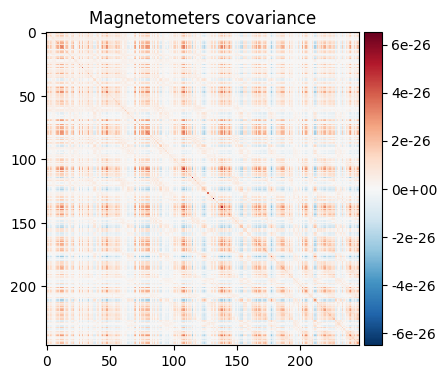

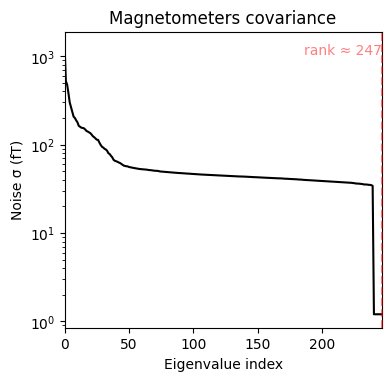

(<Figure size 380x370 with 2 Axes>, <Figure size 380x370 with 1 Axes>)

In [4]:
noise_cov = compute_raw_covariance(empty_room, 
                                   method='auto',
                                   rank="info", 
                                   picks="meg")
mne.viz.plot_cov(noise_cov, empty_room.info)

In [17]:
scaled = "scaled_fsaverage"
subject = "BCOM_01_2"

morphed_root = "/pasteur/appa/scratch/cbangu/MNE-fsaverage-data"
trans_root = "/pasteur/appa/scratch/cbangu/trans"

morphed_bem = os.path.join(morphed_root, f"{scaled}_{subject}/bem/{scaled}_{subject}-5120-5120-5120-bem-sol.fif")
morphed_source = os.path.join(morphed_root, f"{scaled}_{subject}/bem/{scaled}_{subject}-ico-5-src.fif")
morphed_trans = os.path.join(trans_root,f"{subject}-trans.fif")


fs_dir = mne.datasets.fetch_fsaverage(verbose=True)
subjects_dir = os.path.dirname(fs_dir)

0 files missing from root.txt in /pasteur/appa/scratch/cbangu/MNE-fsaverage-data
0 files missing from bem.txt in /pasteur/appa/scratch/cbangu/MNE-fsaverage-data/fsaverage


In [18]:
dir_cov = os.path.join(root_server, 'ciprian_project/data_analyzed/non_normalized/data/WITHOUT_BADS/COVERT')
dir_ov = os.path.join(root_server,'ciprian_project/data_analyzed/non_normalized/data/WITHOUT_BADS/OVERT')
subjects = [subject]
picks = None

data_covert = BcomMEG(dir=dir_cov, subjects=subjects, picks=picks, avoid_reading=False, avoid_producing=False)
data_overt = BcomMEG(dir=dir_ov, subjects=subjects, picks=picks, avoid_reading=False, avoid_producing=False)

Reading /pasteur/zeus/projets/p02/BCOM/ciprian_project/data_analyzed/non_normalized/data/WITHOUT_BADS/COVERT/BCOM_01_2_li_126-epo.fif ...
    Found the data of interest:
        t =    -400.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
14 matching events found
No baseline correction applied
0 projection items activated
Reading /pasteur/zeus/projets/p02/BCOM/ciprian_project/data_analyzed/non_normalized/data/WITHOUT_BADS/COVERT/BCOM_01_2_la_22-epo.fif ...
    Found the data of interest:
        t =    -400.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
16 matching events found
No baseline correction applied
0 projection items activated
Reading /pasteur/zeus/projets/p02/BCOM/ciprian_project/data_analyzed/non_normalized/data/WITHOUT_BADS/COVERT/BCOM_01_2_e_114-epo.fif ...
    Found the data of interest:
        t =    -400.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadat

Not setting metadata
13 matching events found
No baseline correction applied
0 projection items activated
Reading /pasteur/zeus/projets/p02/BCOM/ciprian_project/data_analyzed/non_normalized/data/WITHOUT_BADS/COVERT/BCOM_01_2_la_122-epo.fif ...
    Found the data of interest:
        t =    -400.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
16 matching events found
No baseline correction applied
0 projection items activated
Reading /pasteur/zeus/projets/p02/BCOM/ciprian_project/data_analyzed/non_normalized/data/WITHOUT_BADS/COVERT/BCOM_01_2_se_154-epo.fif ...
    Found the data of interest:
        t =    -400.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
Reading /pasteur/zeus/projets/p02/BCOM/ciprian_project/data_analyzed/non_normalized/data/WITHOUT_BADS/COVERT/BCOM_01_2_me_134-epo.fif ...
    Found the data of interest:

        t =    -400.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Reading /pasteur/zeus/projets/p02/BCOM/ciprian_project/data_analyzed/non_normalized/data/WITHOUT_BADS/OVERT/BCOM_01_2_mi_136-epo.fif ...
    Found the data of interest:
        t =    -400.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
4 matching events found
No baseline correction applied
0 projection items activated
Reading /pasteur/zeus/projets/p02/BCOM/ciprian_project/data_analyzed/non_normalized/data/WITHOUT_BADS/OVERT/BCOM_01_2_ta_62-epo.fif ...
    Found the data of interest:
        t =    -400.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Reading /pasteur/zeus/projets/p02/BCOM/ciprian_project/data_analyzed/non_normalized/dat

In [10]:
subject

'BCOM_01_2'

In [11]:
raw = mne.io.read_raw_fif(fname=os.path.join(root_server,"ciprian_project/data_analyzed/preprocessed/BCOM_01/2/subject_cleaned_ica_raw.fif"))

Opening raw data file /pasteur/zeus/projets/p02/BCOM/ciprian_project/data_analyzed/preprocessed/BCOM_01/2/subject_cleaned_ica_raw.fif...
    Range : 0 ... 378957 =      0.000 ...   757.914 secs
Ready.


In [12]:
raw.info['dev_head_t']

<Transform | MEG device->head>
[[ 0.99998695  0.00350168  0.00372768  0.00148638]
 [-0.00451716  0.94650698  0.32265171 -0.03080797]
 [-0.00239845 -0.32266435  0.94651043  0.06309178]
 [ 0.          0.          0.          1.        ]]

In [13]:
data_overt.data[subject]['re_144'].info['dev_head_t']

<Transform | MEG device->head>
[[ 0.99994797  0.01019562  0.00025355  0.00129247]
 [-0.00975402  0.94878435  0.31577376 -0.03088622]
 [ 0.00297895 -0.31575981  0.94883448  0.0641904 ]
 [ 0.          0.          0.          1.        ]]

In [19]:
first_syl = 'a_112'
epoch_array = data_overt.data[subject][first_syl]

for syl in data_covert.data[subject]:
    if syl != first_syl:
        epoch_array = mne.concatenate_epochs([epoch_array, data_covert.data[subject][syl]])

for syl in data_overt.data[subject]:
    if syl != first_syl:
        print(syl)
        try:
            epoch_array = mne.concatenate_epochs([epoch_array, data_overt.data[subject][syl]])
        except Exception as e:
            print(f"An error occurred with syllable {syl}: {e}")
            continue

Not setting metadata
16 matching events found
No baseline correction applied
Not setting metadata
32 matching events found
No baseline correction applied
Not setting metadata
44 matching events found
No baseline correction applied
Not setting metadata
52 matching events found
No baseline correction applied
Not setting metadata
64 matching events found
No baseline correction applied
Not setting metadata
70 matching events found
No baseline correction applied
Not setting metadata
82 matching events found
No baseline correction applied
Not setting metadata
99 matching events found
No baseline correction applied
Not setting metadata
109 matching events found
No baseline correction applied
Not setting metadata
122 matching events found
No baseline correction applied
Not setting metadata
134 matching events found
No baseline correction applied
Not setting metadata
139 matching events found
No baseline correction applied
Not setting metadata
150 matching events found
No baseline correction ap

Not setting metadata
427 matching events found
No baseline correction applied
ma_32
Not setting metadata
430 matching events found
No baseline correction applied
ma_132
Not setting metadata
433 matching events found
No baseline correction applied
te_64
Not setting metadata
435 matching events found
No baseline correction applied


In [17]:
data_overt.data[subject]['ti_66'].info['dev_head_t']

<Transform | MEG device->head>
[[ 0.99998695  0.00350168  0.00372768  0.00148638]
 [-0.00451716  0.94650698  0.32265171 -0.03080797]
 [-0.00239845 -0.32266435  0.94651043  0.06309178]
 [ 0.          0.          0.          1.        ]]

In [ ]:
data_cov = mne.compute_covariance(epoch_array.copy().crop(tmin=-0.2, tmax=0.6), method='auto', rank="info")

Computing rank from covariance with rank=None
    Using tolerance 1.4e-13 (2.2e-16 eps * 247 dim * 2.5  max singular value)
    Estimated rank (mag): 247
    MAG: rank 247 computed from 247 data channels with 0 projectors


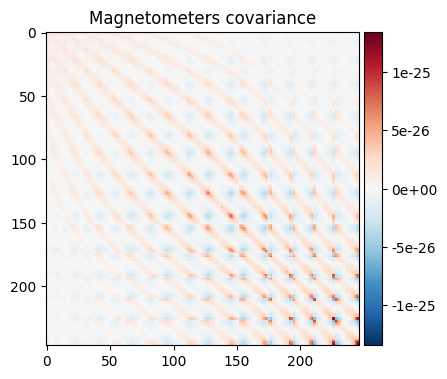

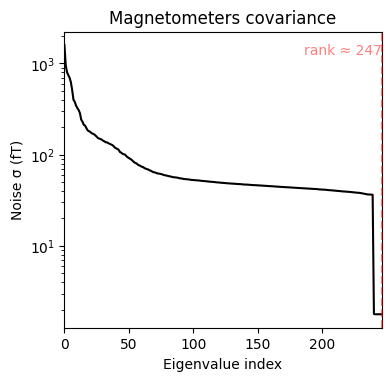

(<Figure size 380x370 with 2 Axes>, <Figure size 380x370 with 1 Axes>)

In [21]:
data_cov.plot(epoch_array.info)

In [22]:
forward_model = mne.make_forward_solution(
    epoch_array.info,
    trans=morphed_trans,
    src=morphed_source, 
    bem=morphed_bem, 
    meg=True, 
    eeg=False
)

Source space          : /pasteur/appa/scratch/cbangu/MNE-fsaverage-data/scaled_fsaverage_BCOM_01_2/bem/scaled_fsaverage_BCOM_01_2-ico-5-src.fif
MRI -> head transform : /pasteur/appa/scratch/cbangu/trans/BCOM_01_2-trans.fif
Measurement data      : instance of Info
Conductor model   : /pasteur/appa/scratch/cbangu/MNE-fsaverage-data/scaled_fsaverage_BCOM_01_2/bem/scaled_fsaverage_BCOM_01_2-5120-5120-5120-bem-sol.fif
Accurate field computations
Do computations in head coordinates
Free source orientations

Reading /pasteur/appa/scratch/cbangu/MNE-fsaverage-data/scaled_fsaverage_BCOM_01_2/bem/scaled_fsaverage_BCOM_01_2-ico-5-src.fif...
Read 2 source spaces a total of 20484 active source locations

Coordinate transformation: MRI (surface RAS) -> head
    0.999667 -0.010944 -0.023385       1.50 mm
    0.010999 0.999937 0.002219      25.63 mm
    0.023359 -0.002476 0.999724      34.46 mm
    0.000000 0.000000 0.000000       1.00

Read 247 MEG channels from info
105 coil definitions read
Coordin

In [23]:
filters = make_lcmv(
    epoch_array.info,
    forward_model,
    data_cov,
    reg=0.05,
    noise_cov=noise_cov,
    pick_ori="max-power",
    weight_norm="unit-noise-gain",
    rank="info",
)

Computing rank from covariance with rank='info'
    MAG: rank 247 after 0 projectors applied to 247 channels
Computing rank from covariance with rank='info'
    MAG: rank 247 after 0 projectors applied to 247 channels
Making LCMV beamformer with rank {'mag': 247}
Computing inverse operator with 247 channels.
    247 out of 247 channels remain after picking
Selected 247 channels
Whitening the forward solution.
Computing rank from covariance with rank={'mag': 247}
    Setting small MAG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing beamformer filters for 20484 sources
Filter computation complete


In [24]:
filters

<Beamformer | LCMV, subject "scaled_fsaverage_BCOM_01_2", 20484 vert, 247 ch, max-power ori, unit-noise-gain norm, matrix inversion, rank 247>

In [25]:
stc = mne.beamformer.apply_lcmv_epochs(epoch_array[0], filters)

Processing epoch : 1
[done]
